# Clustering

Watch the video below:

In [0]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<font size="4" color="red"> Now, let's try it on scatter plot! </font> <br>
<font size="3"> Let's create two lists(Age and Income) and generate values as follow:</font>

In [0]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

age = np.random.randint(20,80,80)
income = np.random.randint(20000,100000,80)




<font size="3">Plotting the data with matplotlib package</font>

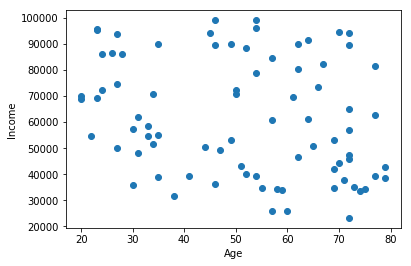

In [0]:
plt.scatter(age,income)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

First line of code: <font size="4">"numpy.c_" (concatenating), converts lists(Age&Income) into one array</font>

Second line of code: <font size="4">If you do not specify number of clusters while creating KMeans, it will go with default(Clusters=8)</font><br>
<font size="4">**Fit** is a function of KMeans package which computes all CLUSTERS in the data</font>

<font size="4">Scale means standardization of the data. Sometimes we need to standartize dataset</font><br>
If you feel confused about scaling, go to the [following link](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e)


In [0]:
data=np.c_[age,income]
model=KMeans(n_clusters=5).fit(scale(data))
print(model.labels_)

C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[3 4 4 0 0 0 4 4 4 4 4 1 0 2 3 1 2 3 1 2 0 1 1 3 1 3 2 1 0 4 3 4 3 1 2 0 2
 0 4 4 4 0 2 1 4 0 4 1 2 4 2 3 4 3 3 0 2 4 2 0 2 1 4 1 4 4 0 1 0 1 1 1 1 1
 1 1 4 2 1 3]


Let's plot the scatters again according to the clusters they belong to.

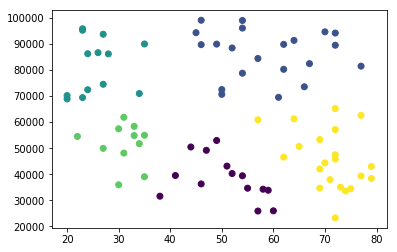

In [0]:
plt.scatter(data[:,0],data[:,1],c=model.labels_)
plt.show()

#### Following are the coordinates of the centroids 

In [0]:
centroid=model.cluster_centers_
centroid

array([[-0.03004299, -1.05191135],
       [ 0.40369018,  1.11008259],
       [-1.42796775,  0.90138039],
       [-1.13228233, -0.45753854],
       [ 1.09341877, -0.72714269]])

#### Following is a function returns inverse of SCALING

In [0]:
def invf(u,v):
    import numpy as np
    return np.c_[[i*np.std(age)+np.mean(age) for i in u],[i*np.std(income)+np.mean(income) for i in v]]
ppp=invf(centroid[:,0].tolist(),centroid[:,1].tolist())
print(ppp)

[[  5.07857143e+01   3.83738571e+04]
 [  5.85714286e+01   8.62023810e+04]
 [  2.56923077e+01   8.15853846e+04]
 [  3.10000000e+01   5.15228182e+04]
 [  7.09523810e+01   4.55585238e+04]]


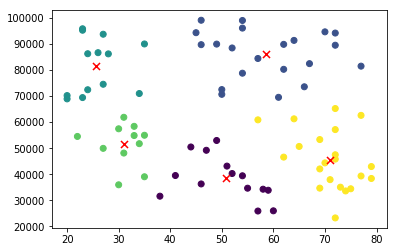

In [0]:
plt.scatter(data[:,0],data[:,1],c=model.labels_)
plt.scatter(ppp[:,0],ppp[:,1],c='red',marker='x',s=50)
plt.show()

#### You might feel confused about couple of things upto now:
(Possible questions you might be thinking)
#### 1)How many Centroids  to use?
####  Answer: Elbow method
#### 2)Where(coordinates) to place those Centroids in the scatter plot?
#### Answer: Kmeans++ algorithm (Python will take care of this) <br>
However, if you are intersted to know about the Kmeans++ algorithm, follow the [link](http://www.real-statistics.com/multivariate-statistics/cluster-analysis/initializing-clusters-k-means/)

There will be one more example to explain Elbow method

In [0]:
#Let's import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#Importing the dataset with pandas
dataset = pd.read_csv("Mall_Customers.csv") #There will be a csv file provided with this ipython file
dataset.head() #print the head to get insight about the data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Analysing Data:
It is a data of custormers in a mall. And we would like to categorize customers for marketing team. Spending score is calculated depending on how much money certain customer has spent in the past and its measure scale is 1 to 100 where 1 - (buys products very rarely) and 100 - (buys products very frequently).<br>
However, we are going to need to use only "Annual Income" and "Spending Score"

In [0]:
X = dataset.iloc[:, [3,4]].values #Counting starts from 0 so Annual Income is on 3rd column and Spending Score is on 4th.
X #now X contains only Annual Income and Spending Score of the Customers

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### Plotting the data

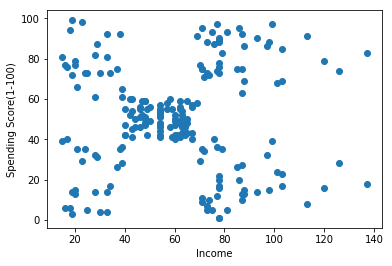

In [0]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Income")
plt.ylabel("Spending Score(1-100)")
plt.show()

Now, let's use **Elbow method** to compute required number of Clusters 

In [0]:
#First, import KMeans from sklearn library
from sklearn.cluster import KMeans

Elbow method computes WCSS(Within-Cluster-Sum-of-Squares)<br>
Basically, WCSS is sum of distances of points from CLUSTER CENTROID<br>
[Elbow method explanation](http://www.nbertagnolli.com/jekyll/update/2015/12/10/Elbow.html)

In [0]:
#Let's create a list called "wcss" which will contain sum of distances from centroid(can be 1 upto 10)
wcss = [] #

In [0]:
for i in range(1, 11): #Let's loop through the cases when we can have upto 10 centroids
    kmeans = KMeans(n_clusters=i, init='k-means++')
    #n_cluster-number of cluster(or centroid). init defines which algorith to use to place the centroid(s)
    kmeans.fit(X) #Fitting the data 
    wcss.append(kmeans.inertia_) #Inertia function computes sum of distances from the centroid(s)

In [0]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 24986.52564064288,
 21916.794789843727,
 19646.482018947238]

#### Let's plot the Elbow method to determine how many centroids are optimal to use

Text(0, 0.5, 'WCSS')

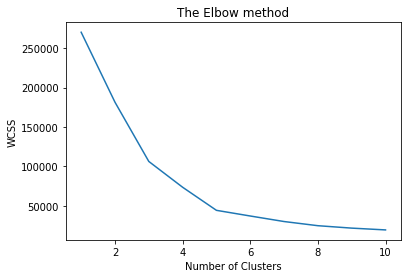

In [0]:
fig, ax1 = plt.subplots()   
ax1.plot(range(1, 11), wcss)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

<font size=4>As we can see, 5 centroids are what we need</font>
#### Now, let's apply k-means with 5 centroids to our dataset

In [0]:
#Applying k-means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = kmeans.fit_predict(X)

In [0]:
X[y_kmeans==0,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

#### Now, let's plot what we have done so far

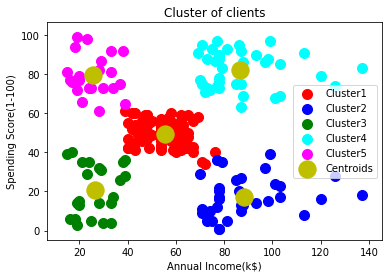

In [0]:
#Visualizing the clusters
fig, ax2 = plt.subplots()
ax2.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='r', label='Cluster1')
ax2.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='b', label='Cluster2')
ax2.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='g', label='Cluster3')
ax2.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='cyan', label='Cluster4')
ax2.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='magenta', label='Cluster5')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="y", label='Centroids')
plt.title("Cluster of clients")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score(1-100)")
ax2.legend()
plt.show()

#### Now let's judge the data
1) people with low income and they do not spend much money in the mall either, therefore let's categorize them under "Sensible"<br>
2) people with average income and they spend average amount of money, therefore they fall under category called "Standard"<br>
3) people with high income, but they do not spend much unfortunately. Therefore let's label them as "Careful"<br>
4) people with high income and high expenses are our TARGET. So, let's label them as "Target"
5) people with low income and high expenses fall under "Careless".

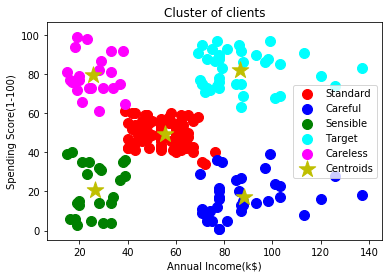

In [0]:
#Let's also change the marker type of Centroids
#Cluster number might change when you apply k-means each time
fig, ax2 = plt.subplots()
ax2.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='r', label='Standard')
ax2.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='b', label='Careful')
ax2.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='g', label='Sensible')
ax2.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='cyan', label='Target')
ax2.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='magenta', label='Careless')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="y", marker='*', label='Centroids')
plt.title("Cluster of clients")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score(1-100)")
ax2.legend()
plt.show()